C:\Users\Aaron\AppData\Local\Temp\ipykernel_19188\1368269972.py:35: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  window = hamming(N)


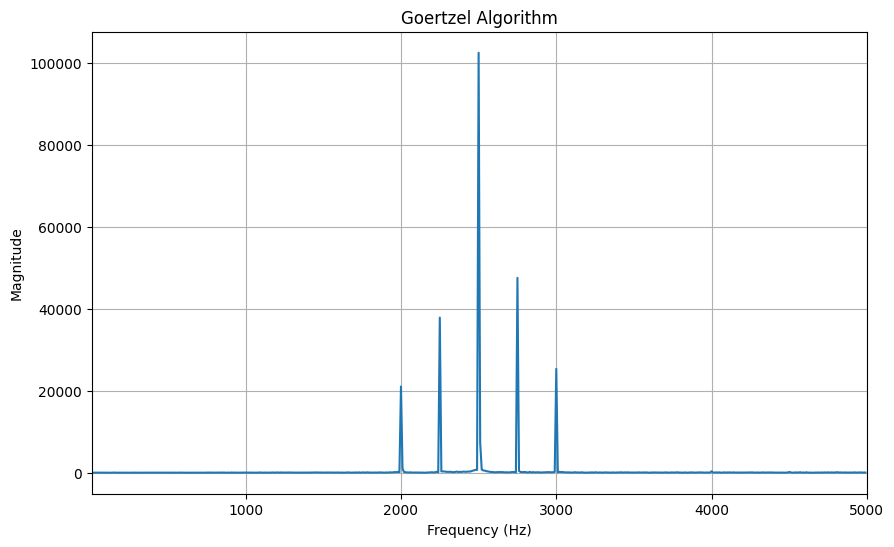

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import hamming

def optimized_goertzel(x, k):
    '''https://www.dsprelated.com/showarticle/495.php'''
    N = np.size(x)
    A = 2*np.pi*k/N
    B = 2*np.pi*k*(N-1)/N
    f = 2*np.cos(A)
    y1 = 0
    y2 = 0
    for n in range(N):
        y0 = x[n] + y1*f - y2
        y2 = y1
        y1 = y0
    return 2*np.hypot(y1*np.cos(B)-y2*np.cos(A*N), y2*np.sin(A*N)-y1*np.sin(B))/N

# Replace 'file_path' with the actual path to your Excel file
file_path = '5_freq_65536.xlsx'
# file_path = '5_freq_131072.xlsx'

# Reading the Excel file
try:
    df = pd.read_excel(file_path, header=None)
except Exception as e:
    print(f"An error occurred: {e}")

# Constants
sample_rate = 250000  # Sample rate in Hz
N = len(df)

# Apply a Hamming window to the data
window = hamming(N)
windowed_signal = df.iloc[:, 1].to_numpy() * window

# Frequency range and bin size
start_freq = 10  # Starting frequency in Hz (excluding DC component)
end_freq = 5000  # Ending frequency in Hz
freq_step = 10  # Frequency step in Hz

# Frequencies for analysis
frequencies = np.arange(start_freq, end_freq, freq_step)

# Computing the Goertzel for each frequency
goertzel_magnitudes = []
for freq in frequencies:
    k = int(freq * N / sample_rate)
    magnitude = optimized_goertzel(windowed_signal, k)
    goertzel_magnitudes.append(magnitude)

# Plotting the results with a line plot
plt.figure(figsize=(10, 6))
plt.plot(frequencies, goertzel_magnitudes)
plt.title("Goertzel Algorithm")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim([start_freq, end_freq])
plt.grid()
plt.show()
